In [65]:
#dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [66]:
train_data = pd.read_csv('application_train.csv')
test_data = pd.read_csv('application_test.csv')
train_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [68]:
train_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [69]:
print(f"Train file shape: {train_data.shape}")
print(f"Test file shape: {test_data.shape}")

Train file shape: (307511, 122)
Test file shape: (48744, 121)


In [70]:
# Amount of missing values for each feature from train_data
train_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [71]:
# From test_data
test_data.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [72]:
# Significant number of features contain missing values. 
# Let's look at their ratio as a percentage of the total number for train_data
(train_data.isnull().sum() / train_data.shape[0] * 100).sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [73]:
# For test_data
(test_data.isnull().sum() / test_data.shape[0] * 100).sort_values(ascending=False)

COMMONAREA_AVG              68.716150
COMMONAREA_MODE             68.716150
COMMONAREA_MEDI             68.716150
NONLIVINGAPARTMENTS_AVG     68.412523
NONLIVINGAPARTMENTS_MODE    68.412523
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 121, dtype: float64

In [74]:
# determine if there are duplicates in datasets
print(f"Duplicates from train data: {train_data.duplicated().sum()}")
print(f"Duplicates from test data: {test_data.duplicated().sum()}")

Duplicates from train data: 0
Duplicates from test data: 0


In [75]:
# Let's see which features are categorical
categoricalFeatures = train_data.select_dtypes(exclude=['float64', 'int64']).columns
categoricalFeatures

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [76]:
# Let's see which features are numerical
numericalFeatures = train_data.select_dtypes(include=['float64', 'int64']).columns
numericalFeatures

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [77]:
# some statistics from train data
train_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [78]:
# some statistics from test data
test_data.describe(include="all")

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
count    48744.000000              48744       48744        48744   
unique            NaN                  2           2            2   
top               NaN         Cash loans           F            N   
freq              NaN              48305       32678        32311   
mean    277796.676350                NaN         NaN          NaN   
std     103169.547296                NaN         NaN          NaN   
min     100001.000000                NaN         NaN          NaN   
25%     188557.750000                NaN         NaN          NaN   
50%     277549.000000                NaN         NaN          NaN   
75%     367555.500000                NaN         NaN          NaN   
max     456250.000000                NaN         NaN          NaN   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count            48744  48744.000000      4.874400e+04  4.874400e+04   
unique               2           NaN               NaN           NaN   
top                  Y           NaN               NaN           NaN   
freq             33658           NaN               NaN           NaN   
mean               NaN      0.397054      1.784318e+05  5.167404e+05   
std                NaN      0.709047      1.015226e+05  3.653970e+05   
min                NaN      0.000000      2.694150e+04  4.500000e+04   
25%                NaN      0.000000      1.125000e+05  2.606400e+05   
50%                NaN      0.000000      1.575000e+05  4.500000e+05   
75%                NaN      1.000000      2.250000e+05  6.750000e+05   
max                NaN     20.000000      4.410000e+06  2.245500e+06   

          AMT_ANNUITY  AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count    48720.000000     4.874400e+04  ...     48744.000000          48744.0   
unique            NaN              NaN  ...              NaN              NaN   
top               NaN              NaN  ...              NaN              NaN   
freq              NaN              NaN  ...              NaN              NaN   
mean     29426.240209     4.626188e+05  ...         0.001559              0.0   
std      16016.368315     3.367102e+05  ...         0.039456              0.0   
min       2295.000000     4.500000e+04  ...         0.000000              0.0   
25%      17973.000000     2.250000e+05  ...         0.000000              0.0   
50%      26199.000000     3.960000e+05  ...         0.000000              0.0   
75%      37390.500000     6.300000e+05  ...         0.000000              0.0   
max     180576.000000     2.245500e+06  ...         1.000000              0.0   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count           48744.0          48744.0               42695.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean                0.0              0.0                   0.002108   
std                 0.0              0.0                   0.046373   
min                 0.0              0.0                   0.000000   
25%                 0.0              0.0                   0.000000   
50%                 0.0              0.0                   0.000000   
75%                 0.0              0.0                   0.000000   
max                 0.0              0.0                   2.000000   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count                42695.000000                42695.000000   
unique                        NaN                         NaN   
top                           NaN                         NaN   
freq                          NaN                         NaN   
mean                     0.001803                    0.002787   
std                      0.046132                    0.054037   
min                      0.000000   

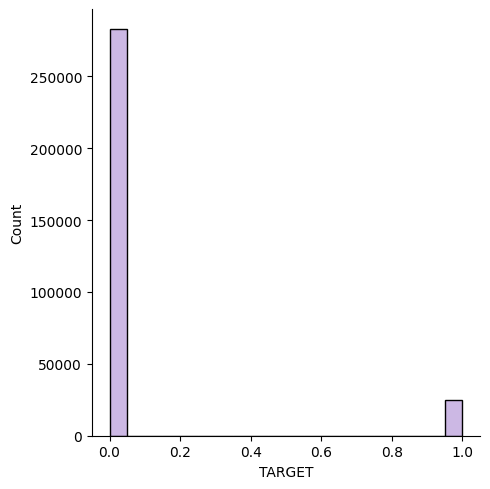

In [79]:
# determine how balanced the training dataset is
sns.displot(train_data['TARGET'])

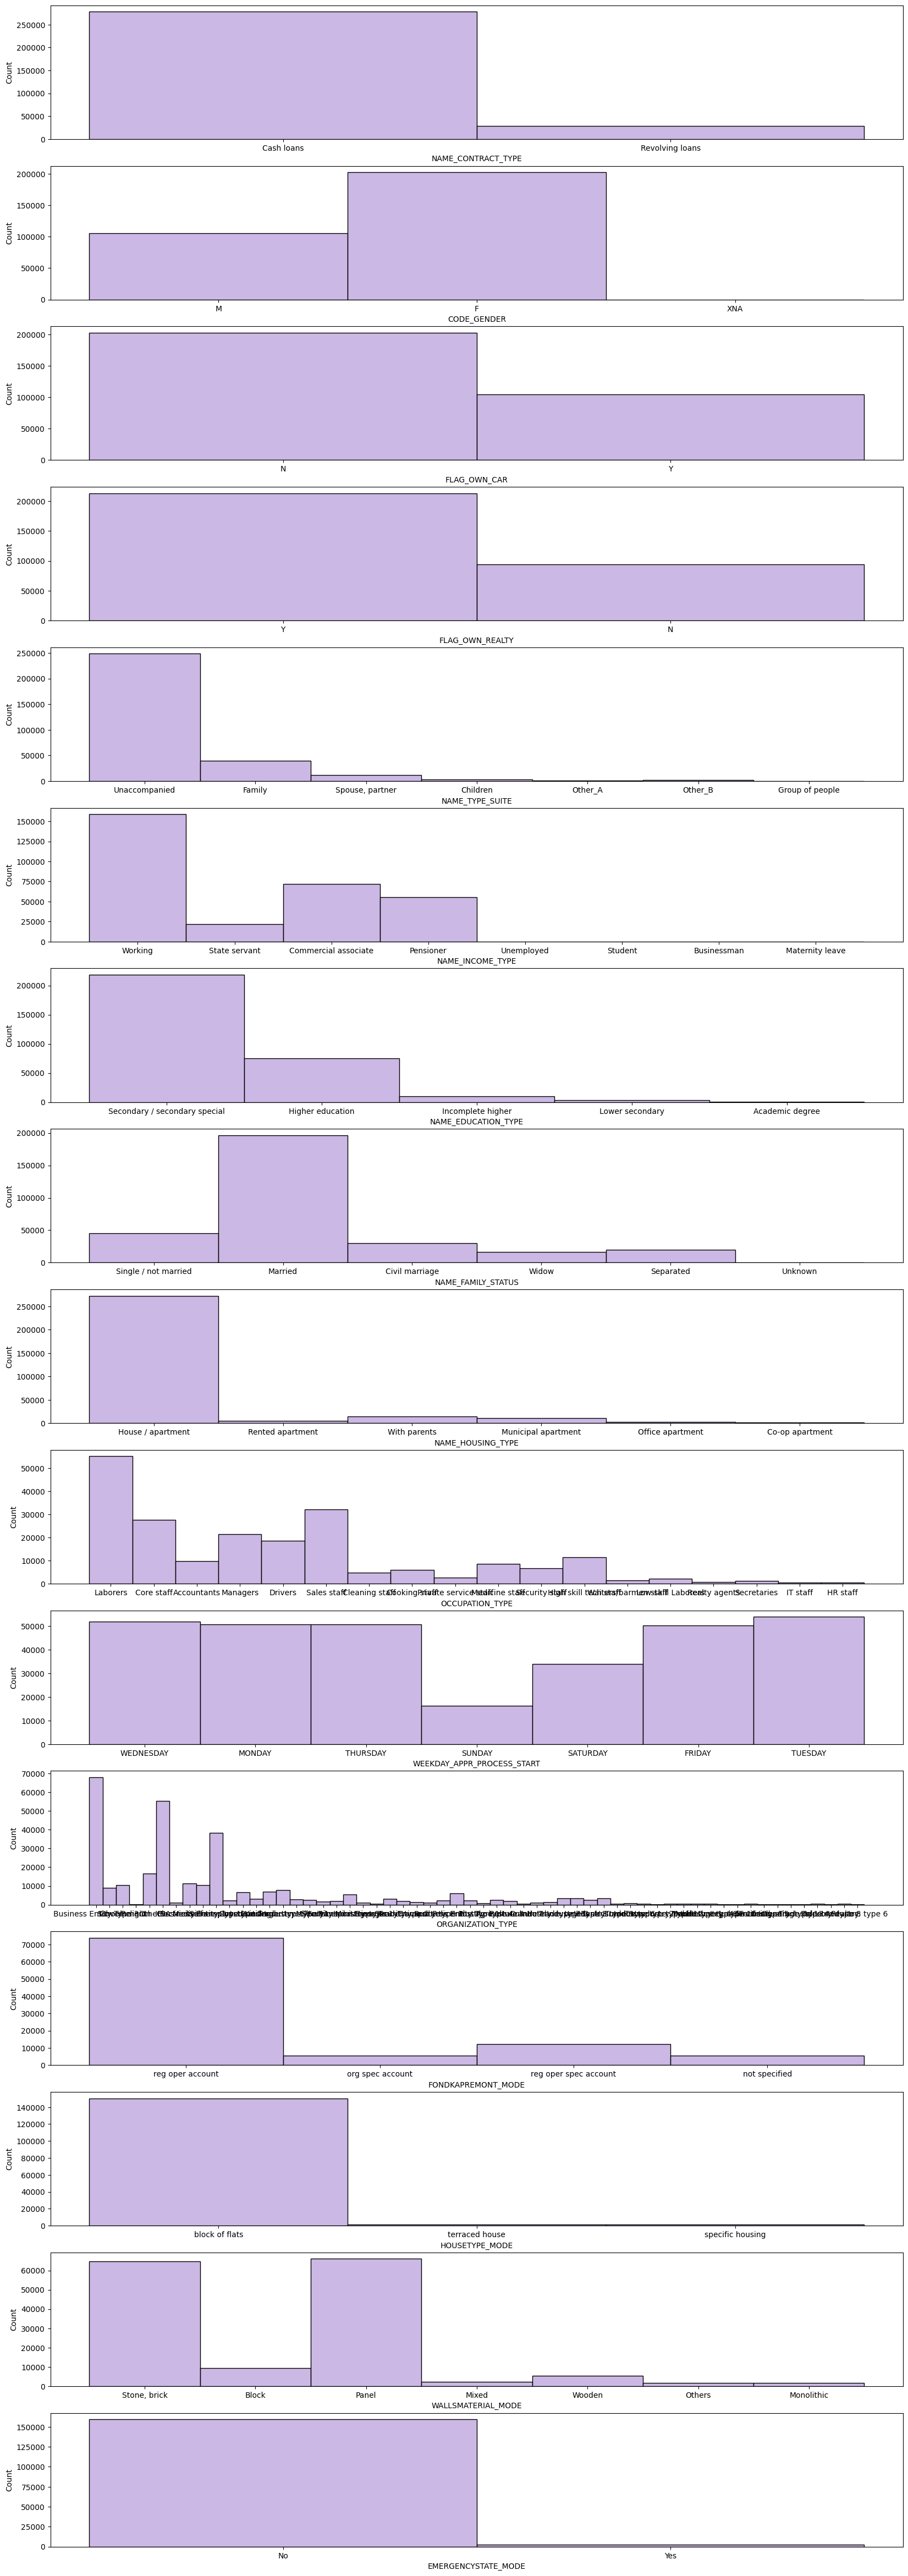

In [80]:
#the dataset is not balanced
#Let's look at the distribution of categorical features in the train data dataset
palette = ["#bca0dc"]
sns.set_palette(palette=palette)
fig, axes = plt.subplots(nrows=len(categoricalFeatures), ncols=1)
fig.set_size_inches(20, 60)
for i, col in enumerate(categoricalFeatures):
    sns.histplot(train_data[col], kde=False, ax=axes[i], color='C1')
plt.show()

array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'TARGET'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>],
       [<Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>,
        <Axes: title={'center': 'FLAG_MOBIL'}>,
        <Axes: title={'center': 'FLAG_EMP_PHONE'}>,
        <Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_CONT_MOBILE'}>,
        <Axes: title={'center': 'FLAG_PHONE'}>,
        <Axes: title={'center': 'FLAG_EMAIL'}>,
        <Axes: title={'center'

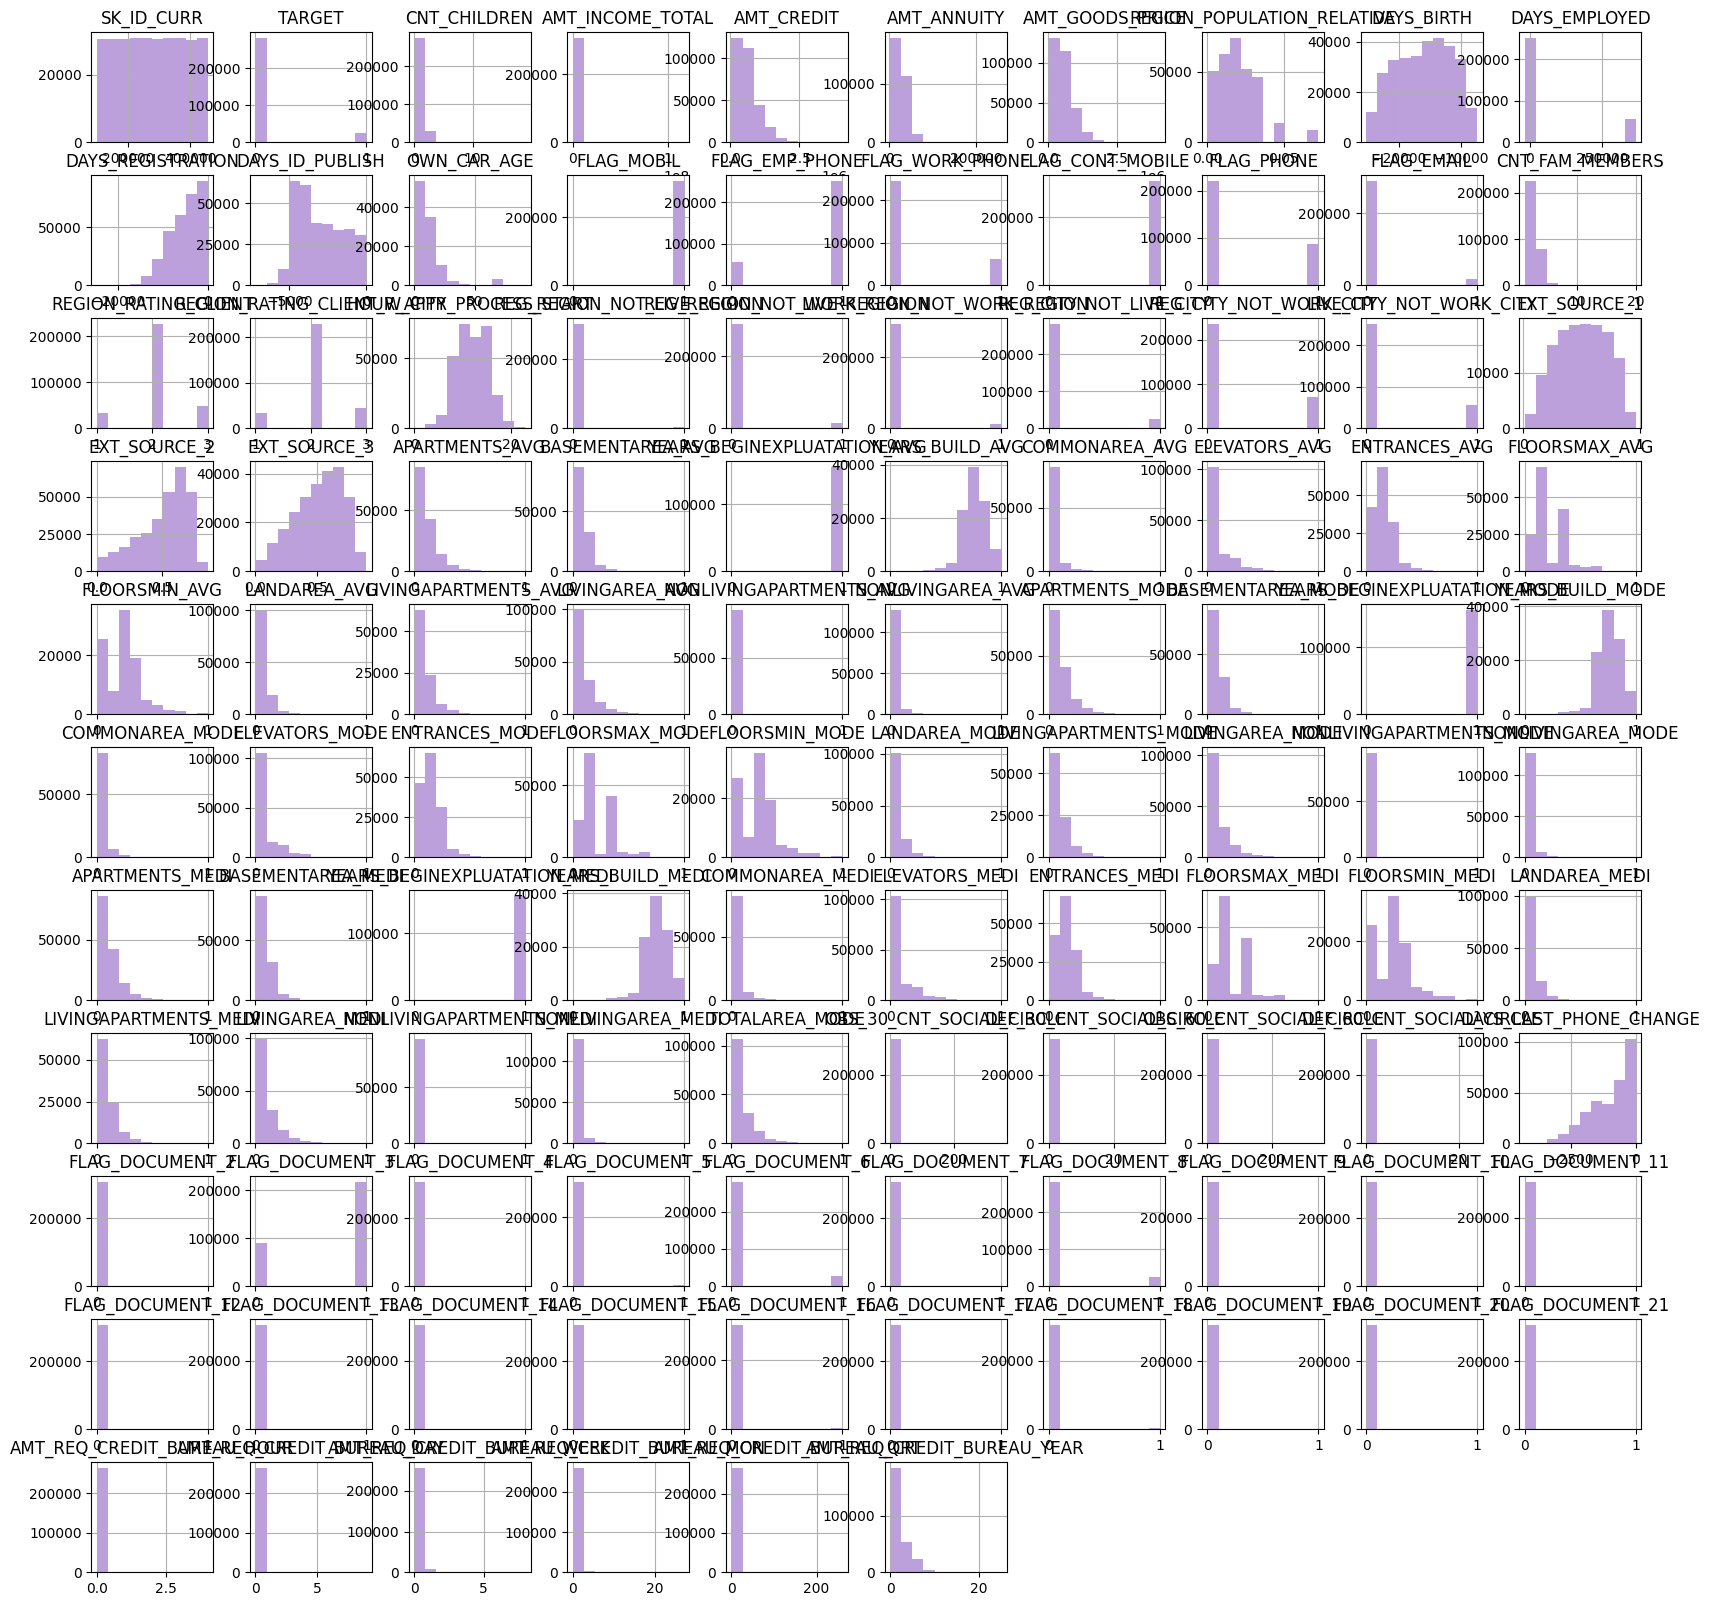

In [81]:
#visualize distributions of numerical features
train_data[numericalFeatures].hist(figsize=(20,20), color="C1")

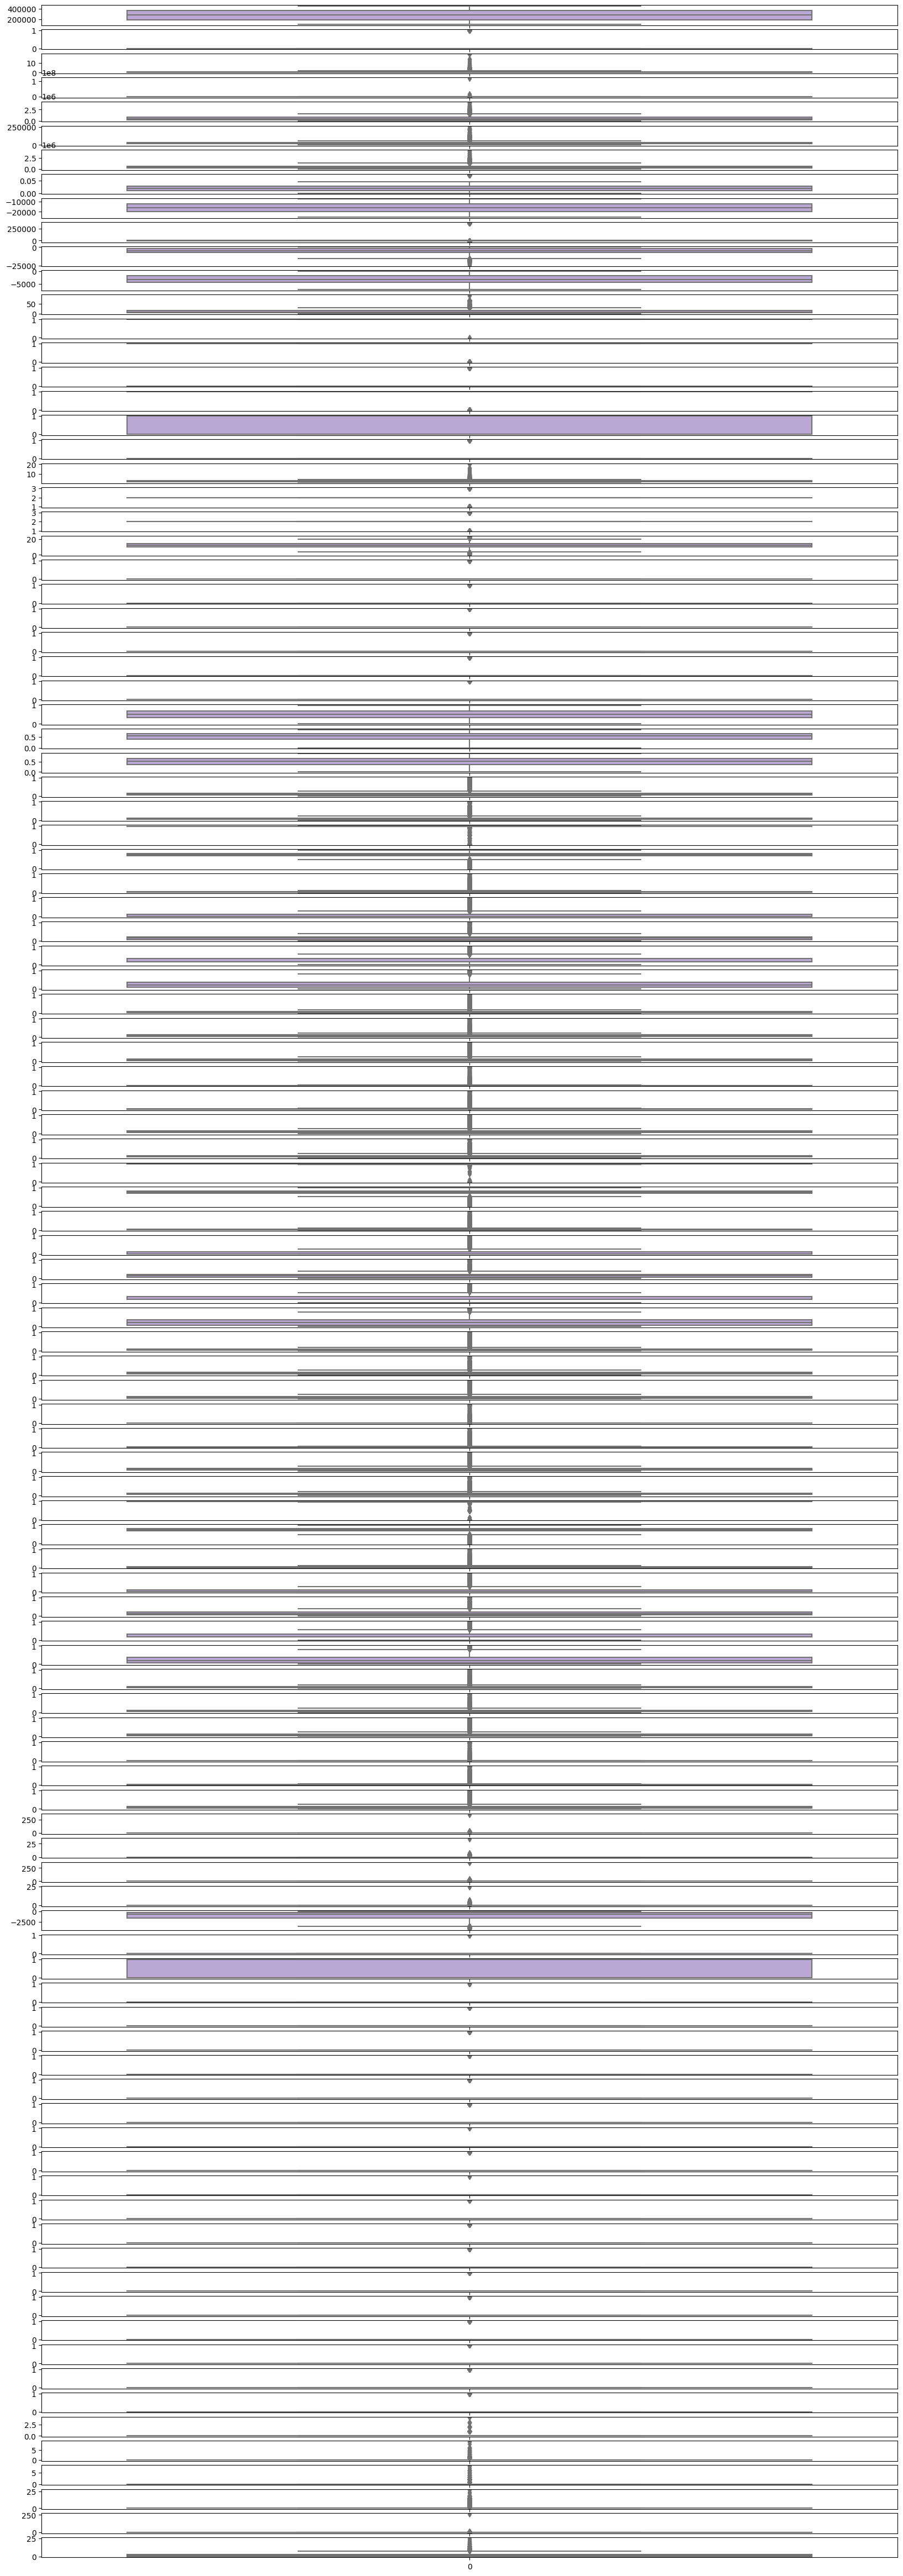

In [82]:
#let's see if there are outliers in the numerical features
fig, axes = plt.subplots(nrows=len(numericalFeatures), ncols=1)
fig.set_size_inches(20, 60)
for i, col in enumerate(numericalFeatures):
     sns.boxplot(data=train_data[col], ax=axes[i], color='C1')
plt.show()

In [85]:
#let's review how which features are correlated in the form of a matrix
correlationMatrix = train_data.corr()
mask = np.array(correlationMatrix)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(30, 60)
sns.heatmap(correlationMatrix, cmap="Purples", mask=mask, vmax=0.8, square=True, annot=True)

/var/folders/y0/ffts6mdj7qj5dkdl_xfzfz5r0000gn/T/ipykernel_4076/2636822891.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = train_data.corr()


<Axes: >

In [86]:
data_test = pd.read_csv("application_test.csv")
data_train = pd.read_csv("application_train.csv")

#from the result we see that the dataset contains a certain number of correlated features
#therefore we will not use them for classification
#selecting several features for classification from those that are not correlated

features = [
    "TARGET",
    "CODE_GENDER",
    "NAME_CONTRACT_TYPE",
    "FLAG_OWN_CAR",
    "CNT_CHILDREN",
    "FLAG_OWN_REALTY", 
    "AMT_INCOME_TOTAL", 
    "AMT_CREDIT", 
    "EXT_SOURCE_3", 
    "EXT_SOURCE_2", 
    "DAYS_EMPLOYED",
    "DAYS_BIRTH",
    "NAME_EDUCATION_TYPE", 
    "NAME_INCOME_TYPE", 
    "AMT_GOODS_PRICE" 
 ]

selected_train_data = data_train[features]
features.remove("TARGET")
selected_test_data = data_test[features]

numerical_features = ["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT", "EXT_SOURCE_3","EXT_SOURCE_2","DAYS_EMPLOYED","DAYS_BIRTH"]
categorical_features = ["CODE_GENDER", "NAME_CONTRACT_TYPE","FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_EDUCATION_TYPE","NAME_INCOME_TYPE"]

# missing data in test
nulled_test_values = selected_test_data.isnull()
total_missed_selected_test = nulled_test_values.sum().sort_values(ascending=False)
percent_missed_selected_test = (nulled_test_values.sum()/nulled_test_values.count()*100).sort_values(ascending=False)

total_percent_missed_selected_test = pd.concat([total_missed_selected_test, percent_missed_selected_test], axis=1,
                                      keys=["Total amount", "Percent missed"])

total_percent_missed_selected_test

Total amount  Percent missed
EXT_SOURCE_3                 8668       17.782701
EXT_SOURCE_2                    8        0.016412
CODE_GENDER                     0        0.000000
NAME_CONTRACT_TYPE              0        0.000000
FLAG_OWN_CAR                    0        0.000000
CNT_CHILDREN                    0        0.000000
FLAG_OWN_REALTY                 0        0.000000
AMT_INCOME_TOTAL                0        0.000000
AMT_CREDIT                      0        0.000000
DAYS_EMPLOYED                   0        0.000000
DAYS_BIRTH                      0        0.000000
NAME_EDUCATION_TYPE             0        0.000000
NAME_INCOME_TYPE                0        0.000000
AMT_GOODS_PRICE                 0        0.000000

In [87]:
#prepare pipeline for numerical
numerical_transformer = Pipeline(
        steps = [
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]
)

#pipeline for categorical
categorical_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# object that helps us tranform our data
prepr = ColumnTransformer(
     transformers = [
         ('numerical', numerical_transformer, numerical_features),
         ('categorical', categorical_transformer, categorical_features)
     ]
)

In [88]:
prepr.fit(data_train[numerical_features + categorical_features])

train_x = prepr.transform(data_train[numerical_features + categorical_features])
test_x = prepr.transform(data_test[numerical_features + categorical_features])

train_y = data_train["TARGET"]

print(f"train_x: {train_x.shape}")
print(f"train_y: {train_y.shape}")
print(f"test_x: {test_x.shape}")

train_x: (307511, 29)
train_y: (307511,)
test_x: (48744, 29)


In [89]:
train_split_x, validate_x, train_split_y, validate_y = train_test_split(train_x, train_y, test_size=0.2)
print(f"Train: {train_split_x.shape}, {train_split_y.shape}")
print(f"Validation: {validate_x.shape}, {validate_y.shape}")

Train: (246008, 29), (246008,)
Validation: (61503, 29), (61503,)


In [90]:
# class_weight = balanced (automatically adjust weight inversely proportional to class frequencies in the input data)

ROUNDS = 2
for i in range(1,ROUNDS + 1):
  print(f"ROUND {i} [tol={1/(i*100)}] ")
  lr = LogisticRegression(class_weight="balanced", tol = 1/(i*100), max_iter=1000)
  lr.fit(train_split_x, train_split_y)
  train_preds = lr.predict(train_split_x)
  print(f"Train ROC_AUC: {roc_auc_score(train_split_y, train_preds)}")
  test_preds = lr.predict(validate_x)
  print(f"Validation ROC_AUC: {roc_auc_score(validate_y, test_preds)}")

ROUND 1 [tol=0.01] 
Train ROC_AUC: 0.6719887360318659
Validation ROC_AUC: 0.6713920551584621
ROUND 2 [tol=0.005] 
Train ROC_AUC: 0.6719887360318659
Validation ROC_AUC: 0.6713920551584621


In [91]:
# Pick LinearRegression due to Validation ROC_AUC score
lr = LogisticRegression(class_weight="balanced", tol = 0.1, max_iter=1000)
lr.fit(train_split_x, train_split_y)

train_preds = lr.predict(train_split_x)
print(f"Train ROC_AUC: {roc_auc_score(train_split_y, train_preds)}")
test_preds = lr.predict(validate_x)
print(f"Validation ROC_AUC: {roc_auc_score(validate_y, test_preds)}")

Train ROC_AUC: 0.6719887360318659
Validation ROC_AUC: 0.6713920551584621


In [92]:
# get probs for test data
probs = lr.predict_proba(test_x)

In [54]:
# saving results to csv file
pd.DataFrame({
    "SK_ID_CURR": data_test["SK_ID_CURR"],
    "TARGET": [pr[1] for pr in probs]
}).to_csv("my_results.csv",index=False)